## importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

### importing library to fetch data from twitter

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd


## setting up consumer key and access token

In [13]:
import tweepy
import pandas as pd

# Set up your Twitter API credentials
consumer_key = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'
access_token = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tweepy.API(auth)

# Fetch tweets using Cursor
fetch_tweets = tweepy.Cursor(api.search_tweets, q="#unitedAIRLINES", count=100, lang="en", tweet_mode="extended").items()

# Create DataFrame with tweet information
data = pd.DataFrame(data=[[tweet_info.created_at.date(), tweet_info.full_text] for tweet_info in fetch_tweets], columns=['Date', 'Tweets'])


## Fetching tweets for United Airlines in extended mode (means entire tweet will come and not just few words + link)

In [15]:
fetch_tweets = tweepy.Cursor(api.search_tweets, q="#unitedAIRLINES", count=100, lang="en", since="2018-09-13", tweet_mode="extended").items()
data = pd.DataFrame(data=[[tweet_info.created_at.date(), tweet_info.full_text] for tweet_info in fetch_tweets], columns=['Date', 'Tweets'])


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


In [16]:
data

,Date,Tweets
0,2023-06-14,🛫🛫 Take flight to your dream destinations! 🌍✨ ...
1,2023-06-14,Anytime anyone says they want government run h...
2,2023-06-14,Exiting UA662 DFW to DEN while I was waiting f...
3,2023-06-14,NEVER I MEAN NEVER FLY WITH @UnitedAirlines_ T...
4,2023-06-14,RT @YvonneYvette24: Flying the friendly skies....
...,...,...
334,2023-06-04,When it comes to selling to corporate accounts...
335,2023-06-04,RT @CtrOfAviation: United 737 Max 9 Landing 🏖️...
336,2023-06-04,#unitedAirline \n#UnitedAirlines \nIs the CEO ...
337,2023-06-04,Direct flight connections from New York to Mal...


## Removing special character from each tweets

In [17]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

## Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [18]:
cdata

,Date,Tweets
0,2023-06-14,Take flight to your dream destinations Enjoy...
1,2023-06-14,Anytime anyone says they want government run h...
2,2023-06-14,Exiting UA662 DFW to DEN while I was waiting f...
3,2023-06-14,NEVER I MEAN NEVER FLY WITH UnitedAirlines THE...
4,2023-06-14,RT YvonneYvette24 Flying the friendly skies Un...
...,...,...
334,2023-06-04,When it comes to selling to corporate accounts...
335,2023-06-04,RT CtrOfAviation United 737 Max 9 Landing RSW ...
336,2023-06-04,unitedAirline UnitedAirlines Is the CEO of Uni...
337,2023-06-04,Direct flight connections from New York to Mal...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [19]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [20]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [21]:
## All the tweets has been clubbed as per their date.

In [22]:
ccdata

,Date,Tweets
0,2023-06-14,Take flight to your dream destinations Enjoy...
1,2023-06-13,My day keeps getting better George Don amp Je...
2,2023-06-12,One thing I can guarantee is that united exec...
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...
5,2023-06-09,Excited to be flying back home to Hawaii in f...
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...
7,2023-06-07,United Airlines flight diverted then stuck on...
8,2023-06-06,Get Comfortable United Airlines Longest Route...
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [27]:
read_stock_p=pd.read_csv("data/UAL.csv")
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-01,35.250000,37.240002,34.950001,36.009998,36.009998,29722200
1,2020-09-02,36.099998,37.099998,35.209999,36.889999,36.889999,26622800
2,2020-09-03,37.130001,39.770000,36.139999,37.400002,37.400002,53966400
3,2020-09-04,38.150002,38.740002,36.459999,38.209999,38.209999,33121600
4,2020-09-08,37.299999,38.480000,36.480000,37.279999,37.279999,33207100
...,...,...,...,...,...,...,...
261,2021-09-15,43.650002,43.910000,43.020000,43.860001,43.860001,10321600
262,2021-09-16,43.860001,45.410000,43.849998,44.470001,44.470001,12204300
263,2021-09-17,44.779999,45.500000,44.110001,44.540001,44.540001,11733300
264,2021-09-20,44.759998,45.340000,43.590000,45.270000,45.270000,14700300


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [28]:
ccdata['Prices']=""

In [29]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [30]:
ccdata

,Date,Tweets,Prices
0,2023-06-14,Take flight to your dream destinations Enjoy...,
1,2023-06-13,My day keeps getting better George Don amp Je...,
2,2023-06-12,One thing I can guarantee is that united exec...,
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,
5,2023-06-09,Excited to be flying back home to Hawaii in f...,
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,
7,2023-06-07,United Airlines flight diverted then stuck on...,
8,2023-06-06,Get Comfortable United Airlines Longest Route...,
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,


So we take the mean for the close price and put it in the blank value

In [33]:
mean = 0
summ = 0
count = 0

for i in range(len(ccdata)):
    if ccdata.Prices.iloc[i] != "":
        summ += int(ccdata.Prices.iloc[i])
        count += 1

if count != 0:
    mean = summ / count
else:
    # Handle the scenario when count is zero
    mean = 0  # Assigning a default value

for i in range(len(ccdata)):
    if ccdata.Prices.iloc[i] == "":
        ccdata.Prices.iloc[i] = int(mean)


## Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [34]:
ccdata

,Date,Tweets,Prices
0,2023-06-14,Take flight to your dream destinations Enjoy...,0
1,2023-06-13,My day keeps getting better George Don amp Je...,0
2,2023-06-12,One thing I can guarantee is that united exec...,0
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,0
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,0
5,2023-06-09,Excited to be flying back home to Hawaii in f...,0
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,0
7,2023-06-07,United Airlines flight diverted then stuck on...,0
8,2023-06-06,Get Comfortable United Airlines Longest Route...,0
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,0


So we take the mean for the close price and put it in the blank value

In [35]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

Now all the entries have some value

In [37]:
ccdata

,Date,Tweets,Prices
0,2023-06-14,Take flight to your dream destinations Enjoy...,0
1,2023-06-13,My day keeps getting better George Don amp Je...,0
2,2023-06-12,One thing I can guarantee is that united exec...,0
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,0
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,0
5,2023-06-09,Excited to be flying back home to Hawaii in f...,0
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,0
7,2023-06-07,United Airlines flight diverted then stuck on...,0
8,2023-06-06,Get Comfortable United Airlines Longest Route...,0
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,0


## Making "prices" column as integer so mathematical operations could be performed easily.

In [38]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [40]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-06-14,Take flight to your dream destinations Enjoy...,0,,,,
1,2023-06-13,My day keeps getting better George Don amp Je...,0,,,,
2,2023-06-12,One thing I can guarantee is that united exec...,0,,,,
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,0,,,,
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,0,,,,
5,2023-06-09,Excited to be flying back home to Hawaii in f...,0,,,,
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,0,,,,
7,2023-06-07,United Airlines flight diverted then stuck on...,0,,,,
8,2023-06-06,Get Comfortable United Airlines Longest Route...,0,,,,
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,0,,,,


## Downloading this package was essential to perform sentiment analysis.

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...


True

## This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sentiment_i_a = SentimentIntensityAnalyzer()

for index, row in ccdata.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', row['Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.loc[index, 'Comp'] = sentence_sentiment['compound']
        ccdata.loc[index, 'Negative'] = sentence_sentiment['neg']
        ccdata.loc[index, 'Neutral'] = sentence_sentiment['neu']
        ccdata.loc[index, 'Positive'] = sentence_sentiment['compound']
    except TypeError:
        print(ccdata.loc[index, 'Tweets'])
        print(index)


In [46]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-06-14,Take flight to your dream destinations Enjoy...,0,-0.6379,0.143,0.725,-0.6379
1,2023-06-13,My day keeps getting better George Don amp Je...,0,0.9991,0.036,0.802,0.9991
2,2023-06-12,One thing I can guarantee is that united exec...,0,0.9982,0.061,0.783,0.9982
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,0,0.9815,0.029,0.834,0.9815
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,0,0.9454,0.078,0.81,0.9454
5,2023-06-09,Excited to be flying back home to Hawaii in f...,0,0.9994,0.06,0.75,0.9994
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,0,0.9998,0.04,0.751,0.9998
7,2023-06-07,United Airlines flight diverted then stuck on...,0,0.9991,0.068,0.751,0.9991
8,2023-06-06,Get Comfortable United Airlines Longest Route...,0,0.9962,0.04,0.82,0.9962
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,0,0.9981,0.033,0.816,0.9981


#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the sam

% of positive tweets=  90.0
% of negative tweets=  10.0


[]

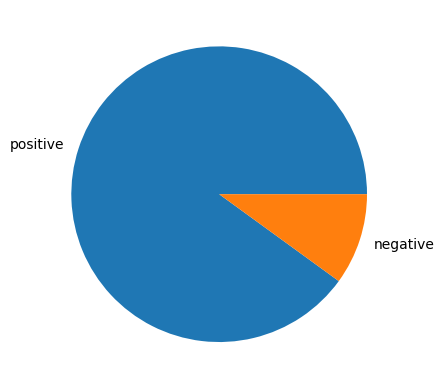

In [50]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [51]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [52]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2023-06-14,0,-0.6379,0.143,0.725,-0.6379
1,2023-06-13,0,0.9991,0.036,0.802,0.9991
2,2023-06-12,0,0.9982,0.061,0.783,0.9982
3,2023-06-11,0,0.9815,0.029,0.834,0.9815
4,2023-06-10,0,0.9454,0.078,0.81,0.9454
5,2023-06-09,0,0.9994,0.06,0.75,0.9994
6,2023-06-08,0,0.9998,0.04,0.751,0.9998
7,2023-06-07,0,0.9991,0.068,0.751,0.9991
8,2023-06-06,0,0.9962,0.04,0.82,0.9962
9,2023-06-05,0,0.9981,0.033,0.816,0.9981


Dividing the dataset into train and test.

In [54]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [55]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\3231284935.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():


In [56]:
print(numpy_df_train)

[[ 0.143  -0.6379]
 [ 0.036   0.9991]
 [ 0.061   0.9982]
 [ 0.029   0.9815]
 [ 0.078   0.9454]
 [ 0.06    0.9994]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [74]:
sentiment_score_list = []
for date in test.columns:
    if date in df_.index:
        sentiment_score = np.asarray([df_.loc[date, 'Negative'], df_.loc[date, 'Positive']])
        sentiment_score_list.append(sentiment_score)
    else:
        print(f"No data found for date: {date}")
numpy_df_test = np.asarray(sentiment_score_list)


No data found for date: Date
No data found for date: Prices
No data found for date: Comp
No data found for date: Negative
No data found for date: Neutral
No data found for date: Positive


In [75]:
c

NameError: name 'c' is not defined

#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [65]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0       0
1       0
2       0
3       0
4       0
5       0


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [66]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\1504975680.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


RandomForestRegressor()

Making Predictions

In [68]:
prediction = rf.predict(numpy_df_test)

In [77]:
print(prediction)

[0. 0. 0.]


In [70]:
import matplotlib.pyplot as plt

In [78]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [76]:
predictions_df_

,Prices
6,0.0
7,0.0
8,0.0


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [79]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestRegressor()


In [88]:
print(prediction)

[0. 0. 0.]


## Plotting the graph for the Predicted_price VS Actual Price


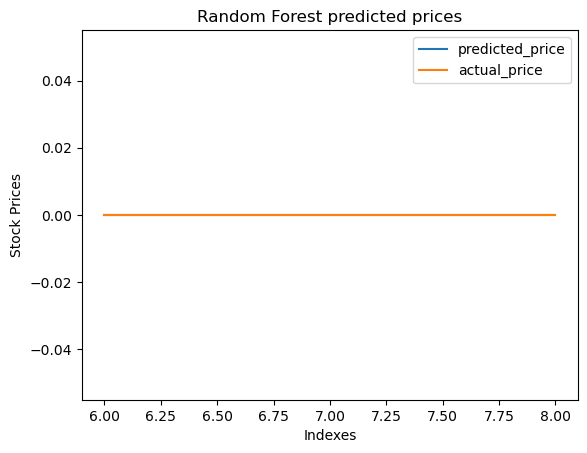

In [89]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [91]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [92]:
reg.predict(numpy_df_test)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### NOTE: Since our dataset is very small and as you can see that fetching 600 tweets could only make data for just 10 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [95]:
stocks_dataf = pd.read_pickle('data/Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

In [96]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [97]:
stocks_dataf = stocks_dataf.reset_index().rename(columns = {'index':'Date'})

#### Removing dot (.) and space from the Tweets

---



In [99]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['Date','adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

,Date,adj_close_price,Tweets
0,2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
1,2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2,2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
3,2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
4,2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...,...
3648,2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
3649,2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
3650,2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
3651,2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


In [100]:
dataframe = stocks_dataf[['adj_close_price']].copy()

# dataframe = dataframe.reset_index().rename(columns = {'index':'Date'})

In [101]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''

In [102]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
0,12469,,,,
1,12472,,,,
2,12474,,,,
3,12480,,,,
4,12398,,,,
...,...,...,...,...,...
3648,19945,,,,
3649,19833,,,,
3650,19819,,,,
3651,19762,,,,


In [103]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        # dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\1310500495.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indexx, row in dataframe.T.iteritems():
C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\1310500495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\1310500495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\13105

In [105]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
0,12469,-0.9814,0.159,0.749,-0.9814
1,12472,-0.8521,0.116,0.785,-0.8521
2,12474,-0.9993,0.198,0.737,-0.9993
3,12480,-0.9982,0.131,0.806,-0.9982
4,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...
3648,19945,-0.9898,0.178,0.719,-0.9898
3649,19833,-0.9844,0.177,0.704,-0.9844
3650,19819,-0.9782,0.14,0.761,-0.9782
3651,19762,-0.995,0.168,0.734,-0.995


% of positive tweets=  44.34711196277033
% of negative tweets=  55.43388995346291


[]

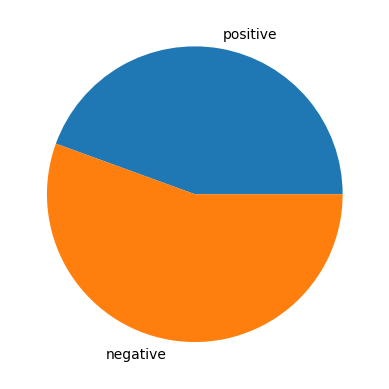

In [107]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

% of positive tweets: 44.34711196277033
% of negative tweets: 55.43388995346291


[]

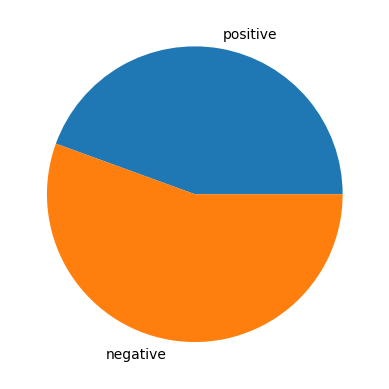

In [110]:
posi = 0
nega = 0

for index, row in dataframe.iterrows():
    get_val = row['Comp']
    if float(get_val) < -0.99:
        nega += 1
    if float(get_val) > -0.99:
        posi += 1

posper = (posi / len(dataframe)) * 100
negper = (nega / len(dataframe)) * 100

print("% of positive tweets:", posper)
print("% of negative tweets:", negper)

arr = np.asarray([posper, negper], dtype=int)
mlpt.pie(arr, labels=['positive', 'negative'])
mlpt.plot()


In [111]:
dataframe.index = dataframe['Date']

KeyError: 'Date'

In [109]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
0,12469,-0.9814,0.159,0.749,-0.9814
1,12472,-0.8521,0.116,0.785,-0.8521
2,12474,-0.9993,0.198,0.737,-0.9993
3,12480,-0.9982,0.131,0.806,-0.9982
4,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...
3648,19945,-0.9898,0.178,0.719,-0.9898
3649,19833,-0.9844,0.177,0.704,-0.9844
3650,19819,-0.9782,0.14,0.761,-0.9782
3651,19762,-0.995,0.168,0.734,-0.995


In [112]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

In [113]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\374192171.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():


In [114]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_22240\374192171.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():


In [117]:
ccdata


,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-06-14,Take flight to your dream destinations Enjoy...,0,-0.6379,0.143,0.725,-0.6379
1,2023-06-13,My day keeps getting better George Don amp Je...,0,0.9991,0.036,0.802,0.9991
2,2023-06-12,One thing I can guarantee is that united exec...,0,0.9982,0.061,0.783,0.9982
3,2023-06-11,Entitlement doesnt get ANY worse than this Un...,0,0.9815,0.029,0.834,0.9815
4,2023-06-10,UnitedAirlines Given the cost of my ticket am...,0,0.9454,0.078,0.81,0.9454
5,2023-06-09,Excited to be flying back home to Hawaii in f...,0,0.9994,0.06,0.75,0.9994
6,2023-06-08,ICAO A05A25Flt UAL549 UnitedAirlines BOSORDFi...,0,0.9998,0.04,0.751,0.9998
7,2023-06-07,United Airlines flight diverted then stuck on...,0,0.9991,0.068,0.751,0.9991
8,2023-06-06,Get Comfortable United Airlines Longest Route...,0,0.9962,0.04,0.82,0.9962
9,2023-06-05,RT JaspreetTravels Peep the fitting taxiway n...,0,0.9981,0.033,0.816,0.9981


In [118]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [119]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [19]:
import numpy as np

# Assuming you have test data in a list or array
test_data = [10, 20, 30, 40]

# Convert the test data into a NumPy array
numpy_dataframe_test = np.array(test_data)


In [21]:
# Convert the test data into a NumPy array
numpy_dataframe_test = np.array(test_data)

In [23]:
import pandas as pd

dataframe = pd.read_csv('data/UAL.csv')


In [30]:
import pandas as pd

data = {
    'Column1': [50, 70, 80],
    'Column2': [200, 300, 400],
    'Column3': [300, 600,700]
}

dataframe = pd.DataFrame(data)
